# 서담프로젝트 화이팅 : >

In [1]:
import pickle

with open('./data/idx_total.pkl','rb') as f:
    idx_total = pickle.load(f)
with open('./data_l/bow_mat.pkl','rb') as f:
    cfd = pickle.load(f)

In [52]:
# key와 value 위치 바꾸기

idx = dict([(value, key) for key, value in idx_total.items()])
idx[0]

'한해'

In [3]:
cfd

array([[11.,  1., 29., ...,  0.,  0.,  0.],
       [ 0.,  0., 41., ...,  0.,  0.,  0.],
       [ 2.,  3., 42., ...,  0.,  0.,  0.],
       ...,
       [ 3.,  1., 69., ...,  0.,  0.,  0.],
       [ 1.,  3., 53., ...,  0.,  0.,  0.],
       [ 1.,  3., 54., ...,  1.,  2.,  1.]])

In [4]:
cfd.shape #181일 #79000여 키워드

(181, 79288)

# 일별 떡밥 키워드별 카운트 (중간 단계)

혹시 몰라서 남겨뒀음!

In [5]:
#키워드별 카운트
import pandas as pd
ct = pd.DataFrame(columns = ['keyword', 'count'])
keyword_list = ['중국','자장면','국수','한국','생각']
idx = 0

for i in keyword_list:
    keyword_index = idx_total[i]
    for j in cfd[:, keyword_index]:
        ct.loc[idx] = [i, j]
        idx += 1

In [6]:
ct

,keyword,count
0,중국,4.0
1,중국,6.0
2,중국,3.0
3,중국,0.0
4,중국,1.0
...,...,...
900,생각,100.0
901,생각,217.0
902,생각,298.0
903,생각,161.0


# 일별 떡밥 키워드군 카운트: what you want

In [54]:
with open('./data/topic_list.pkl','rb') as f:
    topic_list = pickle.load(f)

In [55]:
def KeywordCount(떡밥리스트):
    import pandas as pd
    bob_count = pd.DataFrame(columns = ['group', 'count'])
    group = 떡밥리스트
    idx_name = group[0] #떡밥키워드군의 0번째 단어를 해당 떡밥키워드군 전체를 대표&지칭
    
    for groupword in group:
        idx = 0
        word_idx = idx_total[groupword]
        for j in cfd[:, word_idx]:
            if groupword == group[0]: #그룹 내 첫번째 단어이면, 새로 정의
                bob_count.loc[idx] = [idx_name, j]
            else:
                bob_count.iloc[idx,1] += j 
            idx += 1
    return bob_count #일별 떡밥 키워드군 카운드 데이터프레임

In [56]:
# TEST
A = ['학점','취업','추천','학년']
B = ['중국','자장면','국수','한국','생각']
df_A = KeywordCount(A)
df_B = KeywordCount(B)
display(df_A.head())
display(df_B.head())

,group,count
0,학점,107.0
1,학점,161.0
2,학점,152.0
3,학점,214.0
4,학점,140.0


,group,count
0,중국,81.0
1,중국,292.0
2,중국,209.0
3,중국,168.0
4,중국,196.0


# Trend line plot 

In [57]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fl = fm.FontProperties(fname='./data/NanumGothic.ttf').get_name()
plt.rc('font', family=fl)
plt.rc("axes", unicode_minus=False) #마이너스 부호 표시

In [58]:
colors = pd.read_csv('./data/lineplot_color.txt', header=None)
colors_lst = colors[0].values.tolist()
colors_lst

['#ffbaba', '#ff7b7b', '#ff5252', '#ff0000', '#a70000']

In [59]:
def drawing_lineplot(df, 제목, colorNum, fname=None):
    plt.rcParams["figure.figsize"] = (18,7)
    plt.rc('font', family='Malgun Gothic')
    plt.plot(df.index, df['count'], color=colors_lst[colorNum])
    plt.title(제목, pad=15, fontdict={'fontsize': 20})
    #plt.ylabel('Score', labelpad=15, fontdict={'fontsize': 15})
    plt.yticks([])
    plt.grid(True, axis='x')
    plt.rc('font', family=fl)
    plt.xticks([0, 31, 59, 90, 120, 151],
               labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'], fontsize=13)
    plt.yticks(fontsize=13)
    if fname != None:
        plt.savefig('./data/'+fname+'.png')
    else :
        plt.show()

In [60]:
def drawing_lineplot2(dfs, 제목, colorNums):
    plt.rcParams["figure.figsize"] = (18,7)
    for c, df in enumerate(dfs):
        plt.plot(df.index, df['count'], color=colors_lst[colorNums[c]])
    plt.title(제목, pad=15, fontdict={'fontsize': 20})
    plt.ylabel('Score', labelpad=15, fontdict={'fontsize': 15})
    plt.grid(True, axis='x')
    plt.rc('font', family=fl)
    plt.xticks([0, 31, 59, 90, 120, 151],
               labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'], fontsize=13)
    plt.yticks(fontsize=13)

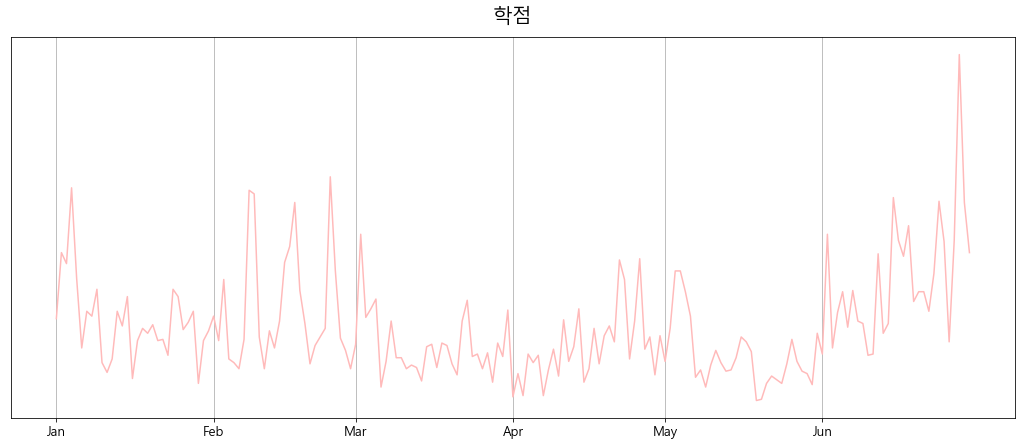

In [50]:
drawing_lineplot(df_A, '학점', 0, 'test')

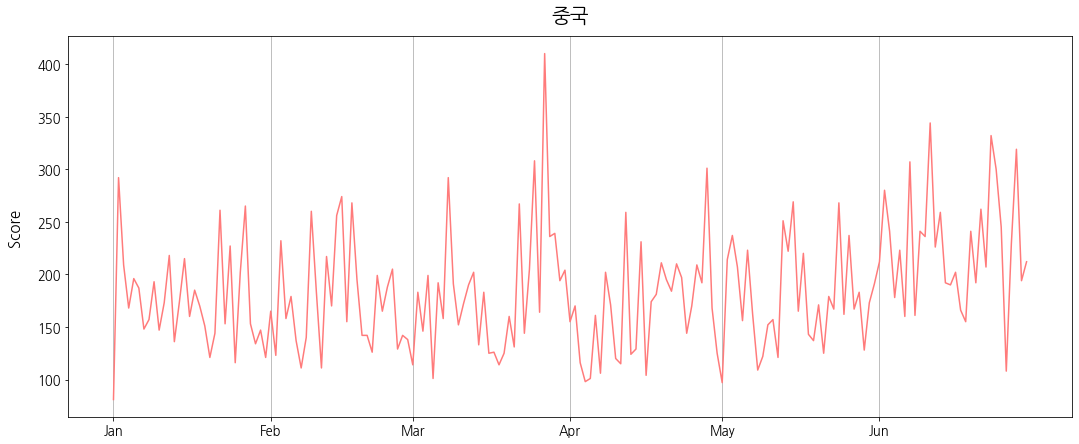

In [147]:
drawing_lineplot(df_B, '중국', 1)

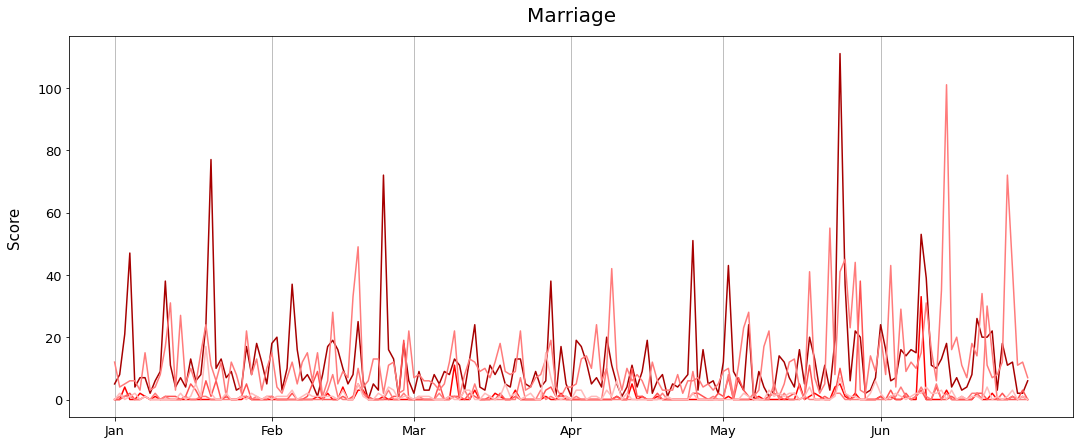

In [29]:
drawing_lineplot2(결혼,'Marriage',[4,3,2,1,1,0])

## 최종 결과물 출력

In [86]:
KeywordCount(topic_list[7])[60:100]

,group,count
60,백신,3.0
61,백신,1.0
62,백신,4.0
63,백신,23.0
64,백신,4.0
65,백신,3.0
66,백신,9.0
67,백신,56.0
68,백신,2.0
69,백신,14.0


In [66]:
drawing_lineplot(KeywordCount(topic_list[0]), '확진자', 3, '확진자')
plt.clf()
drawing_lineplot(KeywordCount(topic_list[1]), '비대면', 3, '비대면')
plt.clf()

<Figure size 1296x504 with 0 Axes>

In [68]:
for n, topic in enumerate(topic_list):
    drawing_lineplot(KeywordCount([topic[0]]), topic[0]+'_test', 3, topic[0]+'_test')
    plt.clf()

<Figure size 1296x504 with 0 Axes>